In [1]:
import keras

Using TensorFlow backend.


# Data Processing

In [2]:
from keras.datasets import reuters

(input_train, y_train), (input_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

8982 train sequences
2246 test sequences


In [3]:
from keras.preprocessing import sequence

maxlen = 500  # cut texts after this number of words

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

input_train shape: (8982, 500)
input_test shape: (2246, 500)
y_train shape: (8982,)
y_test shape: (2246,)


In [4]:
num_classes = max(y_train) + 1
print('# of Classes: ',num_classes)

# of Classes:  46


In [5]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# Multi-Layer Perceptron (MLP) Model Setup

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(16, input_shape=(maxlen,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                8016      
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 46)                782       
_________________________________________________________________
activation_2 (Activation)    (None, 46)                0         
Total params: 8,798
Trainable params: 8,798
Non-trainable params: 0
_________________________________________________________________


In [8]:
batch_size = 64 # number of examples per batch
n_epochs = 20   # number of epochs to train - each epoch is a full pass in the entire trainset   
validation_split = 0.3  # split from the trainset to be used to compute validation scores - the accuracy on an independent set of examples

history = model.fit(input_train, y_train,
                    epochs=n_epochs,
                    batch_size=batch_size,
                    validation_split=validation_split)

Instructions for updating:
Use tf.cast instead.
Train on 6287 samples, validate on 2695 samples
Epoch 1/20
6287/6287 [==============================] - 0s 44us/step - loss: 14.5110 - acc: 0.0907 - val_loss: 12.4006 - val_acc: 0.2249
Epoch 2/20
6287/6287 [==============================] - 0s 19us/step - loss: 12.6783 - acc: 0.2028 - val_loss: 11.0266 - val_acc: 0.3147
Epoch 3/20
6287/6287 [==============================] - 0s 18us/step - loss: 11.7609 - acc: 0.2574 - val_loss: 10.6417 - val_acc: 0.3395
Epoch 4/20
6287/6287 [==============================] - 0s 19us/step - loss: 11.0127 - acc: 0.2973 - val_loss: 10.5740 - val_acc: 0.3440
Epoch 5/20
6287/6287 [==============================] - 0s 18us/step - loss: 10.6946 - acc: 0.3086 - val_loss: 10.5017 - val_acc: 0.3484
Epoch 6/20
6287/6287 [==============================] - 0s 18us/step - loss: 10.4843 - acc: 0.3242 - val_loss: 10.4842 - val_acc: 0.3495
Epoch 7/20
6287/6287 [==============================] - 0s 18us/step - loss: 10.42

# Performance Plot

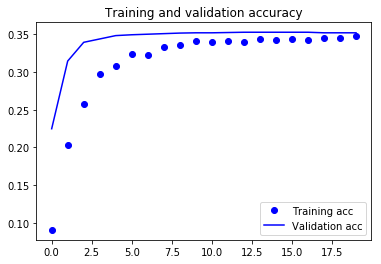

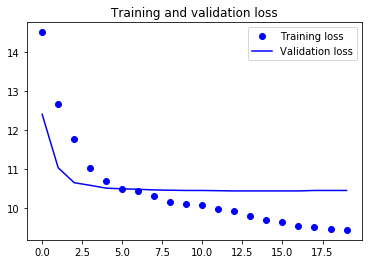

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()